# Importing Libraries

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

# Loading Data

In [3]:
data = pd.read_csv('data_for_lr.csv')

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data Processing

In [9]:
data = data.dropna()
print("Shape of the data: ",data.shape)

Shape of the data:  (699, 2)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# Splitting data

In [20]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

# validation input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)

In [21]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"validation input data shape = {test_input.shape}")
print(f"validation output data shape = {test_output.shape}")

training input data shape = (500, 1)
training output data shape = (500, 1)
validation input data shape = (199, 1)
validation output data shape = (199, 1)


# <font color = "green">Linear regression</font>

## Forward Propagation

f(x) = m*x + c

In [22]:
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = np.multiply(m, train_input) + c

    return predictions

## Cost Function

summation(1/2n*(y-f(x))^2)

In [23]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5

    return cost

## Gradient Descent for Backpropagation

df = summ(f(x) - y)/n

dm = df * x

dc = df * 1

In [24]:
def backward_propagation(train_input, train_output, predictions):

    derivatives = dict()

    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives["dm"] = dm
    derivatives["dc"] = dc

    return derivatives

## Update Parameters

$m = m - (\alpha$ * dm )

$c = c - (\alpha$ * dc )

Where,
$\alpha$ = learning rate

In [27]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]

    return parameters

## Model Training

In [32]:
def train(train_input, train_output, learning_rate, iters):

    # random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)*-1
    parameters["c"] = np.random.uniform(0,1)*-1

    plt.figure()

    #loss
    loss = list()

    # iteration
    for i in range(iters):

        # forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        # cost function
        cost = cost_function(predictions, train_output)

        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")

        # plot
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")

        legend = ax.legend()

        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, predictions, "*", label = "Training")
        plt.show()

        # backward propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        # update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

## Training

Iteration = 1, Loss = 4310.362375911482


<Figure size 640x480 with 0 Axes>

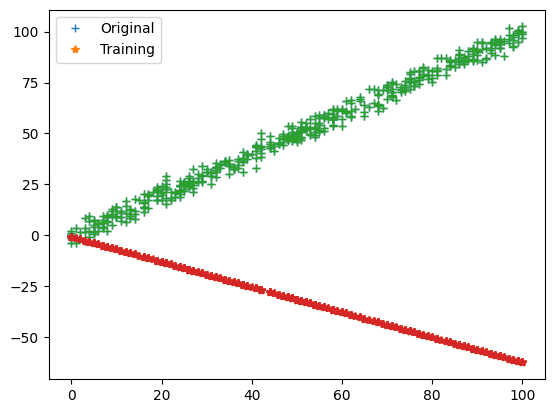

Iteration = 2, Loss = 1957.7663505764742


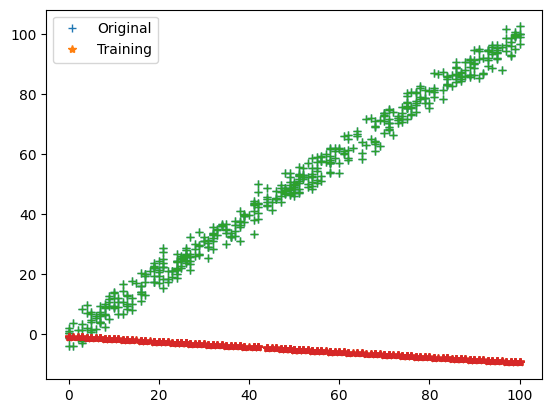

Iteration = 3, Loss = 890.3909273474208


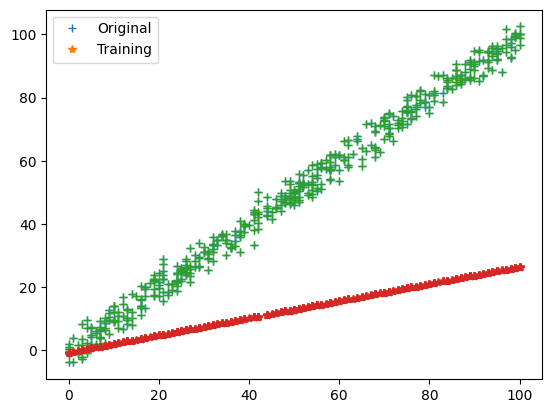

Iteration = 4, Loss = 406.12151485718067


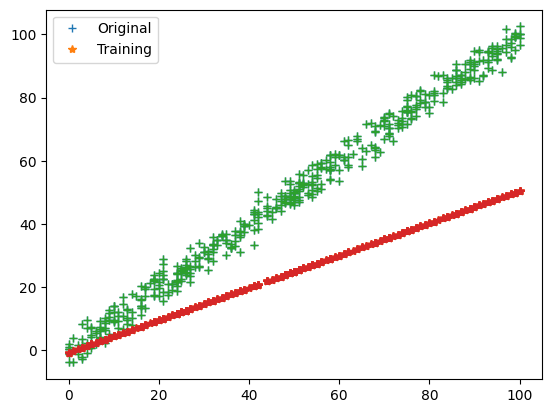

Iteration = 5, Loss = 186.40794531142598


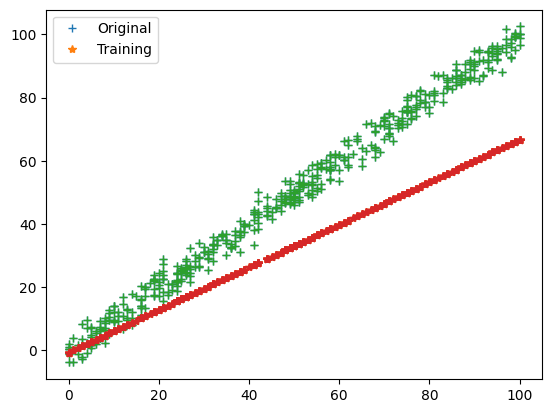

Iteration = 6, Loss = 86.72365474257471


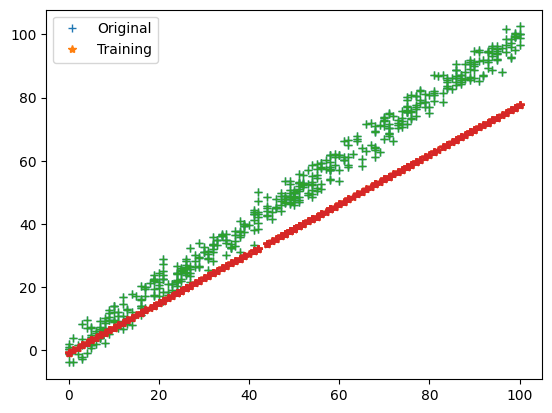

Iteration = 7, Loss = 41.496780994956076


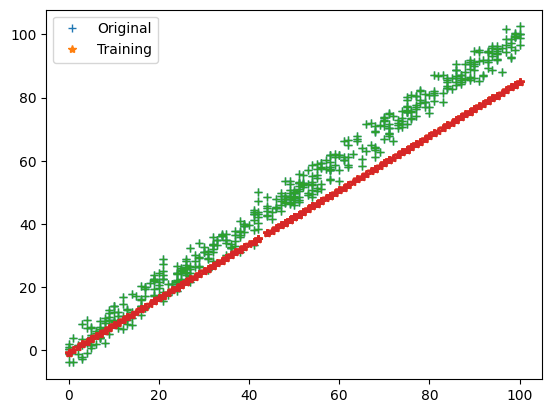

Iteration = 8, Loss = 20.977297578445345


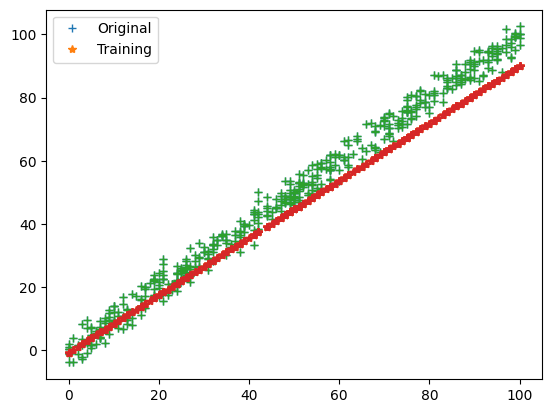

Iteration = 9, Loss = 11.667584522117442


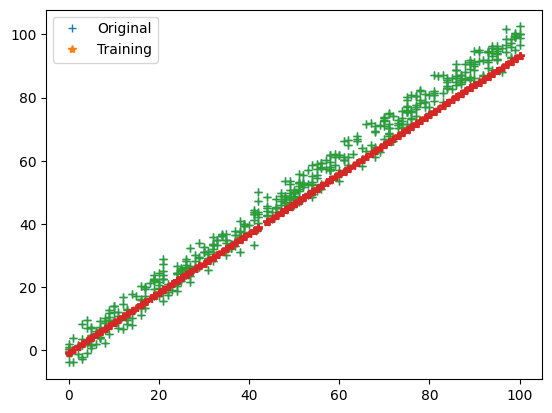

Iteration = 10, Loss = 7.443756694643572


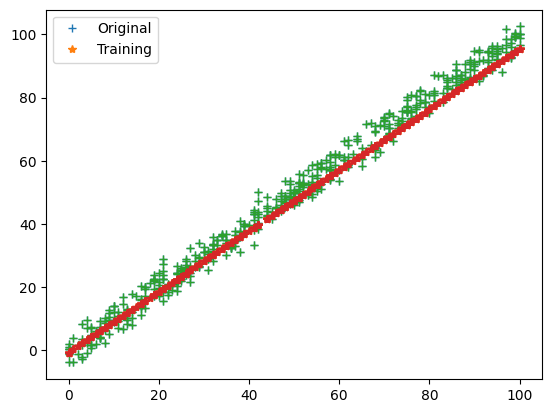

Iteration = 11, Loss = 5.527400628872175


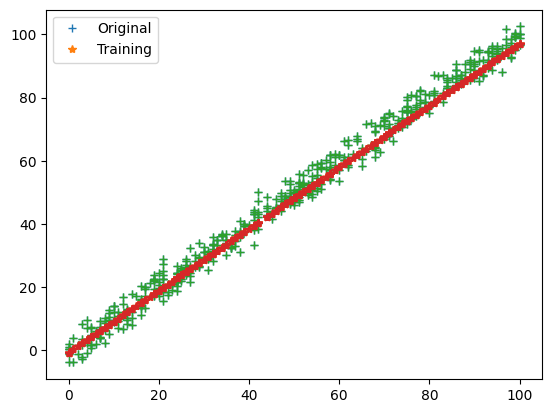

Iteration = 12, Loss = 4.657947057271409


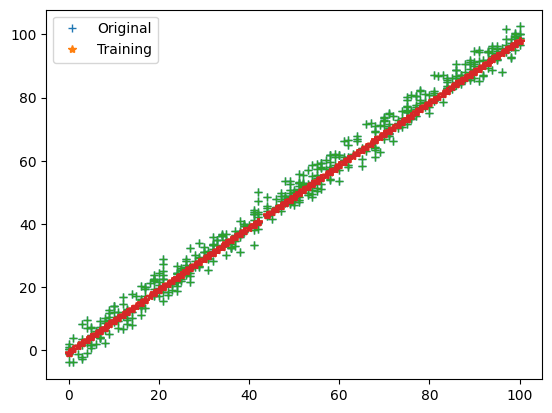

Iteration = 13, Loss = 4.26347430690354


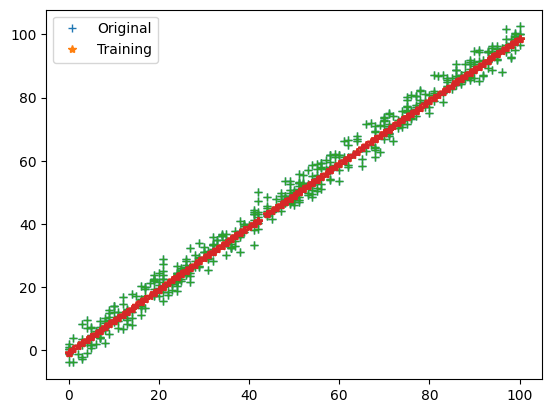

Iteration = 14, Loss = 4.084500881272735


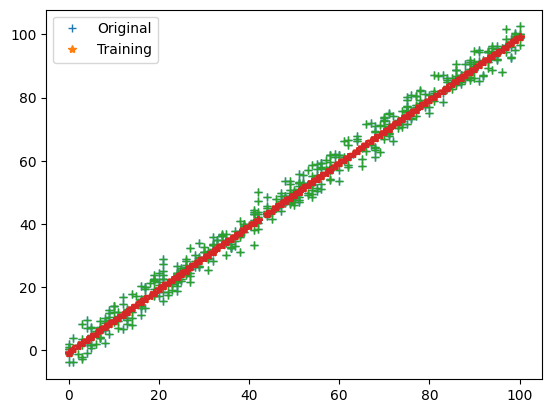

Iteration = 15, Loss = 4.003299738006428


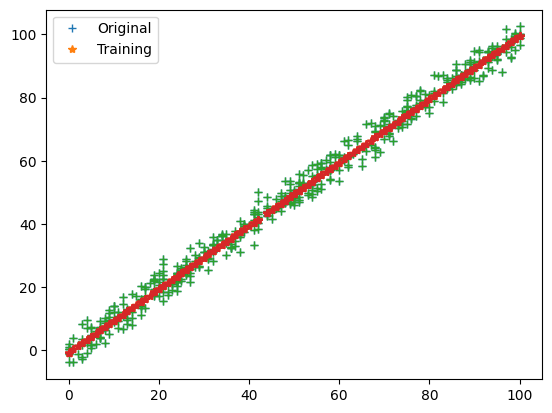

Iteration = 16, Loss = 3.9664579875808537


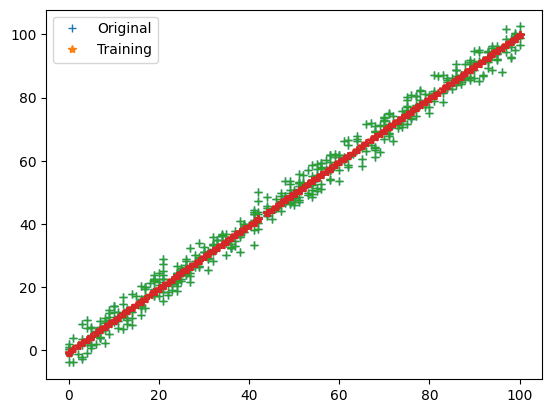

Iteration = 17, Loss = 3.949742142856761


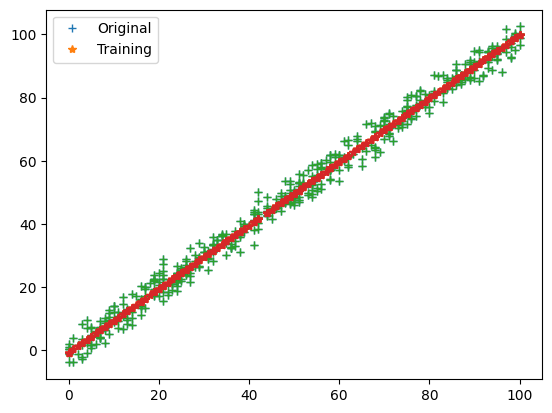

Iteration = 18, Loss = 3.942157443877064


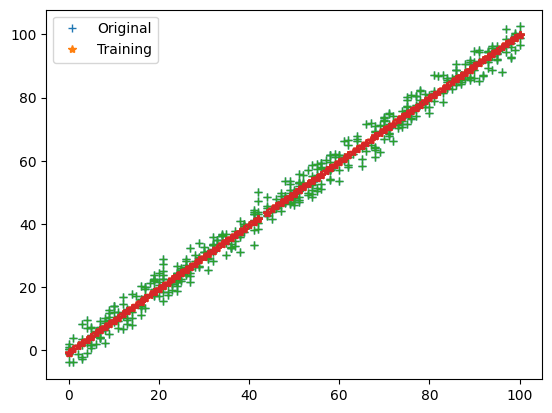

Iteration = 19, Loss = 3.9387155558709783


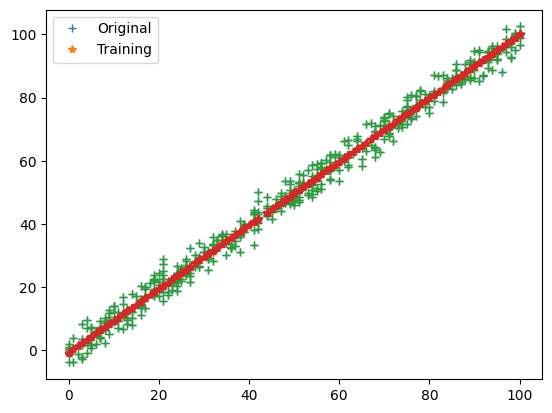

Iteration = 20, Loss = 3.937153265827717


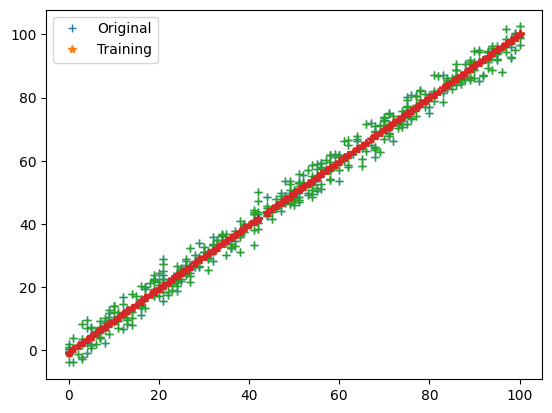

In [38]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [39]:
print(parameters)

{'m': np.float64(1.0072109674279854), 'c': np.float64(-0.6859343273972889)}


In [40]:
loss

[np.float64(4310.362375911482),
 np.float64(1957.7663505764742),
 np.float64(890.3909273474208),
 np.float64(406.12151485718067),
 np.float64(186.40794531142598),
 np.float64(86.72365474257471),
 np.float64(41.496780994956076),
 np.float64(20.977297578445345),
 np.float64(11.667584522117442),
 np.float64(7.443756694643572),
 np.float64(5.527400628872175),
 np.float64(4.657947057271409),
 np.float64(4.26347430690354),
 np.float64(4.084500881272735),
 np.float64(4.003299738006428),
 np.float64(3.9664579875808537),
 np.float64(3.949742142856761),
 np.float64(3.942157443877064),
 np.float64(3.9387155558709783),
 np.float64(3.937153265827717)]

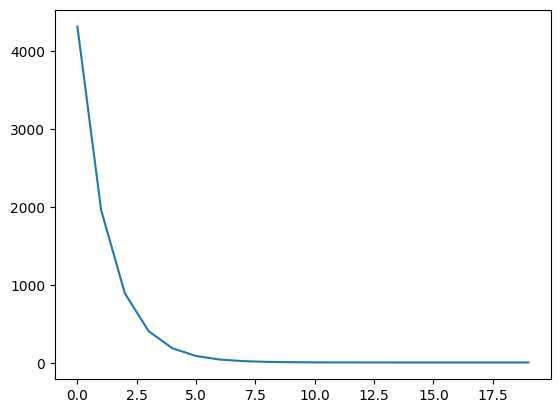

In [41]:
plt.plot(loss)

## Let's Predict

In [42]:
test_predictions = test_input * parameters["m"] + parameters["c"]

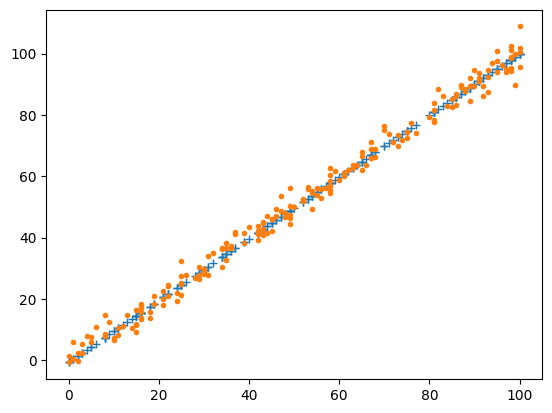

In [43]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output,".")
plt.show()

## Cost of Prediction

In [44]:
cost_function(test_output, test_predictions)

np.float64(4.1011051873984945)